In [1]:
import skdim
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import torch
from plotly.subplots import make_subplots
from phd import get_phd, get_raw_phd
from tqdm import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import modeling_utils
if not hasattr(modeling_utils, "ALL_PARALLEL_STYLES") or modeling_utils.ALL_PARALLEL_STYLES is None:
    modeling_utils.ALL_PARALLEL_STYLES = ["tp", "none", "colwise", 'rowwise']

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
#dictionary with all datasets
dict_data = benchmark.generate()
#ground truth dataframe
truth = benchmark.truth
#generate a dataset with custom parameters
M1_sphere_custom = benchmark.generate(name="M1_Sphere",n=2500,dim=10,d=5)

M1_sphere = dict_data['M1_Sphere'] #np.array (n x dim)
truth



,Intrinsic Dimension,Number of variables,Description
M1_Sphere,10,11,10D sphere linearly embedded
M2_Affine_3to5,3,5,Affine space
M3_Nonlinear_4to6,4,6,"Concentrated figure, mistakable with a 3D one"
M4_Nonlinear,4,8,Nonlinear manifold
M5a_Helix1d,1,3,1D helix
M5b_Helix2d,2,3,2D helix
M6_Nonlinear,6,36,Nonlinear manifold
M7_Roll,2,3,Swiss Roll
M8_Nonlinear,12,72,Nonlinear (highly curved) manifold
M9_Affine,20,20,Affine space


In [3]:
def get_raw_phd_in_loop(points, alpha, ntries=10):
    values = []
    for _ in range(ntries):
        values.append(get_raw_phd(points, alpha=alpha))

    return values

In [8]:
from tqdm import tqdm


alpha2values = dict()
for alpha in tqdm(range(1, 2)):
    alpha2values[alpha] = get_raw_phd_in_loop(0.5 * (dict_data['M8_Nonlinear'] + 1), alpha, 7)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


100%|█████████████████████████████████████████████| 1/1 [00:25<00:00, 25.67s/it]


In [9]:
pd.DataFrame(alpha2values).std()

1    0.332876
dtype: float64

In [10]:
pd.DataFrame(alpha2values).median()

1    14.121111
dtype: float64

In [43]:
pd.DataFrame(alpha2values).to_csv("phds.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt


plt.show()

In [60]:
from tqdm import tqdm


alpha2values = dict()
for alpha in tqdm(range(1, 7)):
    alpha2values[alpha] = get_raw_phd_in_loop(0.5 * (dict_data['M8_Nonlinear'] + 1), alpha, 7)

  0%|                                                     | 0/6 [00:00<?, ?it/s]

[[1.         0.99998196]
 [0.99998196 1.        ]]
[[1.         0.99998232]
 [0.99998232 1.        ]]
[[1.         0.99994609]
 [0.99994609 1.        ]]
[[1.         0.99995542]
 [0.99995542 1.        ]]
[[1.         0.99996331]
 [0.99996331 1.        ]]
[[1.         0.99999046]
 [0.99999046 1.        ]]
[[1.         0.99998315]
 [0.99998315 1.        ]]
[[1.         0.99994765]
 [0.99994765 1.        ]]
[[1.         0.99996051]
 [0.99996051 1.        ]]
[[1.         0.99998412]
 [0.99998412 1.        ]]
[[1.         0.99993065]
 [0.99993065 1.        ]]
[[1.         0.99998236]
 [0.99998236 1.        ]]
[[1.         0.99995022]
 [0.99995022 1.        ]]
[[1.         0.99990222]
 [0.99990222 1.        ]]
[[1.         0.99998703]
 [0.99998703 1.        ]]
[[1.         0.99993455]
 [0.99993455 1.        ]]
[[1.         0.99996556]
 [0.99996556 1.        ]]
[[1.         0.99998081]
 [0.99998081 1.        ]]


 17%|███████▌                                     | 1/6 [00:05<00:28,  5.68s/it]

[[1.         0.99997173]
 [0.99997173 1.        ]]
[[1.         0.99997306]
 [0.99997306 1.        ]]
[[1.         0.99998971]
 [0.99998971 1.        ]]
[[1.        0.9998586]
 [0.9998586 1.       ]]
[[1.         0.99986825]
 [0.99986825 1.        ]]
[[1.         0.99993496]
 [0.99993496 1.        ]]
[[1.         0.99977552]
 [0.99977552 1.        ]]
[[1.         0.99976059]
 [0.99976059 1.        ]]
[[1.        0.9998178]
 [0.9998178 1.       ]]
[[1.         0.99980527]
 [0.99980527 1.        ]]
[[1.         0.99988082]
 [0.99988082 1.        ]]
[[1.         0.99963729]
 [0.99963729 1.        ]]
[[1.         0.99977824]
 [0.99977824 1.        ]]
[[1.         0.99978577]
 [0.99978577 1.        ]]
[[1.         0.99986175]
 [0.99986175 1.        ]]
[[1.         0.99979988]
 [0.99979988 1.        ]]
[[1.        0.9999006]
 [0.9999006 1.       ]]
[[1.         0.99971428]
 [0.99971428 1.        ]]
[[1.         0.99995113]
 [0.99995113 1.        ]]
[[1.         0.99979573]
 [0.99979573 1.   

 33%|███████████████                              | 2/6 [00:11<00:22,  5.71s/it]

[[1.         0.99997444]
 [0.99997444 1.        ]]
[[1.         0.99982768]
 [0.99982768 1.        ]]
[[1.         0.99996693]
 [0.99996693 1.        ]]
[[1.         0.99954329]
 [0.99954329 1.        ]]
[[1.         0.99934462]
 [0.99934462 1.        ]]
[[1.         0.99976498]
 [0.99976498 1.        ]]
[[1.         0.99945378]
 [0.99945378 1.        ]]
[[1.         0.99897763]
 [0.99897763 1.        ]]
[[1.         0.99955995]
 [0.99955995 1.        ]]
[[1.         0.99985638]
 [0.99985638 1.        ]]
[[1.         0.99979812]
 [0.99979812 1.        ]]
[[1.         0.99967541]
 [0.99967541 1.        ]]
[[1.         0.99979891]
 [0.99979891 1.        ]]
[[1.         0.99950041]
 [0.99950041 1.        ]]
[[1.         0.99965533]
 [0.99965533 1.        ]]
[[1.         0.99978719]
 [0.99978719 1.        ]]
[[1.         0.99949206]
 [0.99949206 1.        ]]
[[1.        0.9997148]
 [0.9997148 1.       ]]
[[1.        0.9993791]
 [0.9993791 1.       ]]
[[1.         0.99980161]
 [0.99980161 1

 50%|██████████████████████▌                      | 3/6 [00:17<00:17,  5.69s/it]

[[1.         0.99989822]
 [0.99989822 1.        ]]
[[1.         0.99991885]
 [0.99991885 1.        ]]
[[1.         0.99983034]
 [0.99983034 1.        ]]
[[1.        0.9994538]
 [0.9994538 1.       ]]
[[1.         0.99964907]
 [0.99964907 1.        ]]
[[1.         0.99936366]
 [0.99936366 1.        ]]
[[1.         0.99941064]
 [0.99941064 1.        ]]
[[1.         0.99885695]
 [0.99885695 1.        ]]
[[1.        0.9991857]
 [0.9991857 1.       ]]
[[1.         0.99911875]
 [0.99911875 1.        ]]
[[1.         0.99911232]
 [0.99911232 1.        ]]
[[1.         0.99968127]
 [0.99968127 1.        ]]
[[1.         0.99976993]
 [0.99976993 1.        ]]
[[1.         0.99926677]
 [0.99926677 1.        ]]
[[1.         0.99948722]
 [0.99948722 1.        ]]
[[1.        0.9990423]
 [0.9990423 1.       ]]
[[1.         0.99919067]
 [0.99919067 1.        ]]
[[1.        0.9990789]
 [0.9990789 1.       ]]
[[1.         0.99934422]
 [0.99934422 1.        ]]
[[1.         0.99964333]
 [0.99964333 1.       

 67%|██████████████████████████████               | 4/6 [00:22<00:11,  5.71s/it]

[[1.         0.99956395]
 [0.99956395 1.        ]]
[[1.         0.99939469]
 [0.99939469 1.        ]]
[[1.         0.99949282]
 [0.99949282 1.        ]]
[[1.         0.99871922]
 [0.99871922 1.        ]]
[[1.        0.9988395]
 [0.9988395 1.       ]]
[[1.         0.99819721]
 [0.99819721 1.        ]]
[[1.         0.99781302]
 [0.99781302 1.        ]]
[[1.        0.9997203]
 [0.9997203 1.       ]]
[[1.         0.99898561]
 [0.99898561 1.        ]]
[[1.         0.99777541]
 [0.99777541 1.        ]]
[[1.         0.99679188]
 [0.99679188 1.        ]]
[[1.        0.9984553]
 [0.9984553 1.       ]]
[[1.         0.99928883]
 [0.99928883 1.        ]]
[[1.         0.99898408]
 [0.99898408 1.        ]]
[[1.         0.99895528]
 [0.99895528 1.        ]]
[[1.         0.99389792]
 [0.99389792 1.        ]]
[[1.        0.9989626]
 [0.9989626 1.       ]]
[[1.         0.99894073]
 [0.99894073 1.        ]]
[[1.         0.99865982]
 [0.99865982 1.        ]]
[[1.         0.99845486]
 [0.99845486 1.       

 83%|█████████████████████████████████████▌       | 5/6 [00:28<00:05,  5.76s/it]

[[1.        0.9996816]
 [0.9996816 1.       ]]
[[1.         0.99961078]
 [0.99961078 1.        ]]
[[1.         0.99965338]
 [0.99965338 1.        ]]
[[1.         0.99779608]
 [0.99779608 1.        ]]
[[1.         0.99651336]
 [0.99651336 1.        ]]
[[1.         0.99906025]
 [0.99906025 1.        ]]
[[1.         0.99902303]
 [0.99902303 1.        ]]
[[1.         0.99738548]
 [0.99738548 1.        ]]
[[1.         0.99904971]
 [0.99904971 1.        ]]
[[1.         0.99684608]
 [0.99684608 1.        ]]
[[1.         0.99890256]
 [0.99890256 1.        ]]
[[1.         0.99803131]
 [0.99803131 1.        ]]
[[1.         0.99766642]
 [0.99766642 1.        ]]
[[1.         0.99651524]
 [0.99651524 1.        ]]
[[1.         0.99840884]
 [0.99840884 1.        ]]
[[1.         0.99675103]
 [0.99675103 1.        ]]
[[1.         0.99870591]
 [0.99870591 1.        ]]
[[1.         0.99692567]
 [0.99692567 1.        ]]
[[1.       0.999527]
 [0.999527 1.      ]]
[[1.         0.99712649]
 [0.99712649 1.   

100%|█████████████████████████████████████████████| 6/6 [00:34<00:00,  5.73s/it]

[[1.         0.99743784]
 [0.99743784 1.        ]]
[[1.         0.99658987]
 [0.99658987 1.        ]]
[[1.         0.99794144]
 [0.99794144 1.        ]]


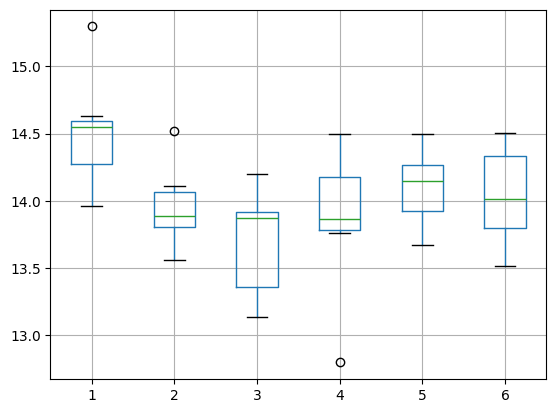

In [61]:
import matplotlib.pyplot as plt


pd.DataFrame(alpha2values).boxplot()
plt.show()

In [12]:
from tqdm import tqdm


alpha2values = dict()
for alpha in tqdm(range(1, 2)):
    alpha2values[alpha] = get_raw_phd_in_loop(0.5 * (dict_data['Mbeta'] + 1), alpha, 7)

  0%|                                                     | 0/1 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 40)


100%|█████████████████████████████████████████████| 1/1 [00:21<00:00, 21.10s/it]


NameError: name 'plt' is not defined

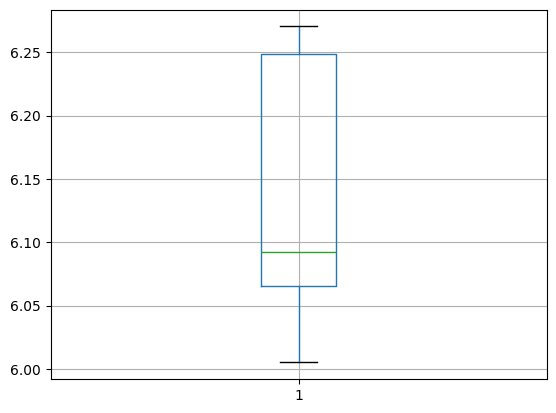

In [13]:
pd.DataFrame(alpha2values).boxplot()
plt.show()

In [14]:
pd.DataFrame(alpha2values).std()

1    0.110139
dtype: float64

In [78]:
manifold = random_sample(0.5 * (dict_data[manifold_name] + 1), n_dots)

In [80]:
manifold_name

'M6_Nonlinear'

In [83]:
get_raw_phd_in_loop(M1_sphere, 1)

[[1.         0.99998034]
 [0.99998034 1.        ]]
[[1.         0.99997837]
 [0.99997837 1.        ]]
[[1.         0.99996769]
 [0.99996769 1.        ]]
[[1.         0.99995947]
 [0.99995947 1.        ]]
[[1.         0.99998708]
 [0.99998708 1.        ]]
[[1.         0.99997842]
 [0.99997842 1.        ]]
[[1.         0.99997435]
 [0.99997435 1.        ]]
[[1.         0.99998006]
 [0.99998006 1.        ]]
[[1.         0.99998382]
 [0.99998382 1.        ]]
[[1.         0.99991992]
 [0.99991992 1.        ]]
[[1.         0.99995406]
 [0.99995406 1.        ]]
[[1.         0.99998236]
 [0.99998236 1.        ]]
[[1.         0.99995906]
 [0.99995906 1.        ]]
[[1.         0.99997566]
 [0.99997566 1.        ]]
[[1.         0.99998204]
 [0.99998204 1.        ]]
[[1.         0.99998137]
 [0.99998137 1.        ]]
[[1.         0.99995938]
 [0.99995938 1.        ]]
[[1.         0.99995155]
 [0.99995155 1.        ]]
[[1.         0.99996727]
 [0.99996727 1.        ]]
[[1.        0.9999252]
 [0.9999

[14.44680037381691,
 14.631994553530257,
 14.189647125817983,
 14.395601196973724,
 14.320594900816307,
 14.293999719796716,
 14.346385145399418,
 14.474880946946334,
 14.05431229518147,
 14.597880169652832]

In [15]:
def random_sample(arr: np.array, size: int = 1) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]


# np.random.seed(32443)
manifolds = ['Mp3_Paraboloid', 'Mp2_Paraboloid', 'Mp1_Paraboloid', 'Mn2_Nonlinear', 'Mn1_Nonlinear', 'M6_Nonlinear']
manifold_name2df = dict()
for manifold_name in tqdm(manifolds):
    for n_dots in [dict_data[manifold_name].shape[0]]:
        alpha2values = dict()
        manifold = random_sample(0.5 * (dict_data[manifold_name] + 1), n_dots)
        for alpha in tqdm(range(1, 4)):
            alpha2values[alpha] = get_raw_phd_in_loop(manifold, alpha, 30)
        df = pd.DataFrame(alpha2values).assign(n_dots=n_dots).assign(manifold_name=manifold_name)
        manifold_name2df[manifold_name + str(n_dots)] = df

  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 33%|███████████████                              | 1/3 [01:11<02:23, 71.62s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


 67%|██████████████████████████████               | 2/3 [02:27<01:14, 74.24s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 30)


  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 33%|███████████████                              | 1/3 [01:11<02:22, 71.18s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


 67%|██████████████████████████████               | 2/3 [02:21<01:10, 70.83s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 21)


  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 33%|██████████████▋                             | 1/3 [04:01<08:02, 241.43s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


 67%|█████████████████████████████▎              | 2/3 [07:18<03:35, 215.29s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 12)


  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 33%|██████████████▋                             | 1/3 [03:21<06:43, 201.51s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


 67%|█████████████████████████████▎              | 2/3 [06:03<02:58, 178.05s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 96)


  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 33%|███████████████                              | 1/3 [01:27<02:54, 87.23s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


 67%|██████████████████████████████               | 2/3 [02:47<01:22, 82.88s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 72)


  0%|                                                     | 0/3 [00:00<?, ?it/s]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 33%|██████████████▋                             | 1/3 [01:54<03:49, 114.65s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


 67%|█████████████████████████████▎              | 2/3 [03:32<01:44, 104.96s/it]

mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)
mn_points =  40 max_points =  2500 point_jump =  351
input_shape: (2500, 36)


100%|████████████████████████████████████████████| 6/6 [34:59<00:00, 349.85s/it]


In [16]:
lst = []
for key, value in manifold_name2df.items():
    lst.append(value.assign(manifold_name_full=key))
df_concat = pd.concat(lst)

Mp3_Paraboloid2500


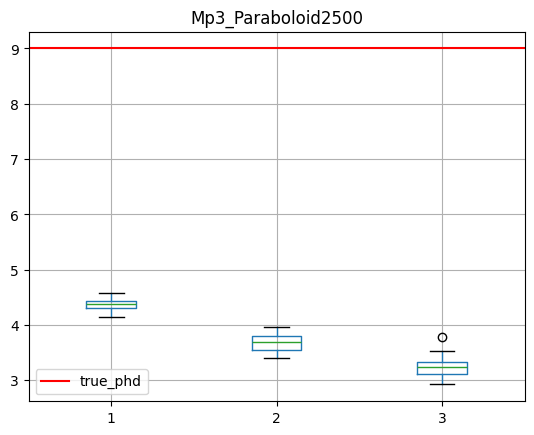

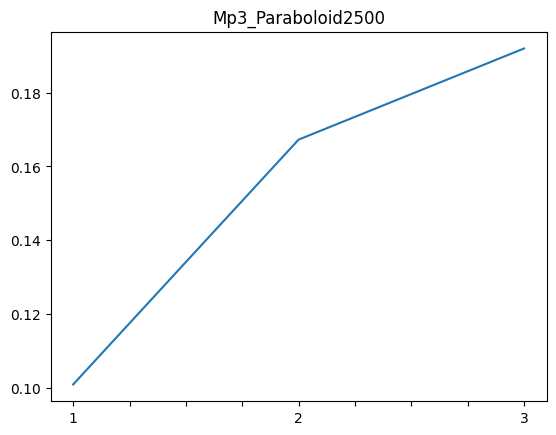

Mp2_Paraboloid2500


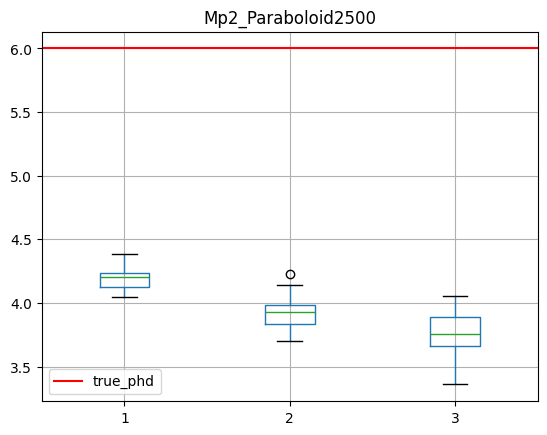

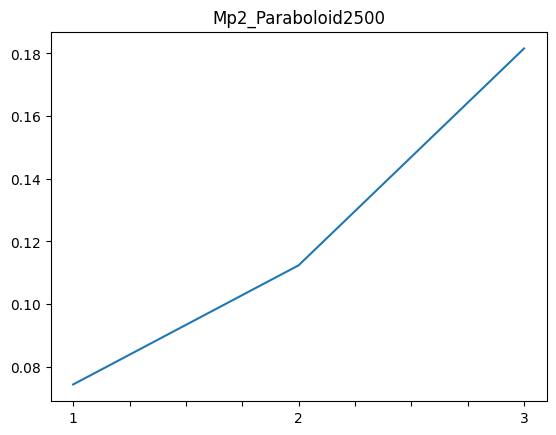

Mp1_Paraboloid2500


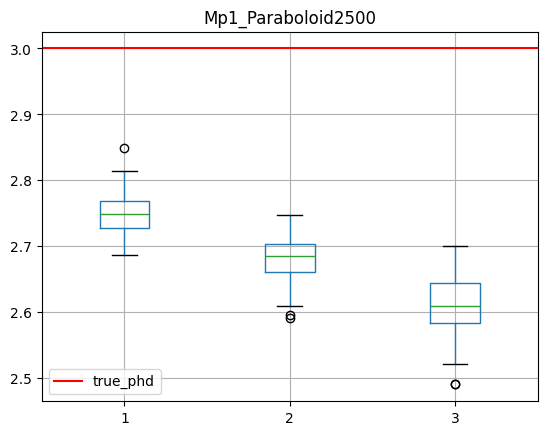

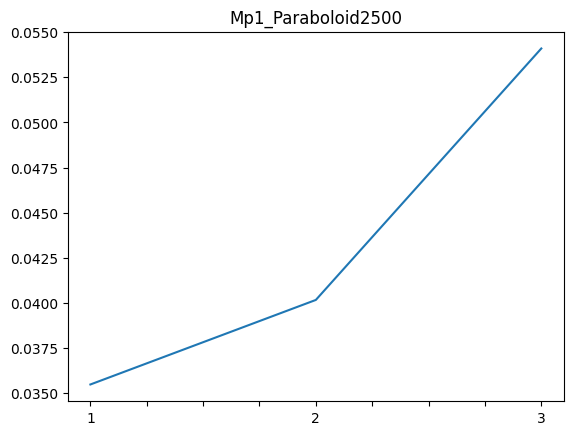

Mn2_Nonlinear2500


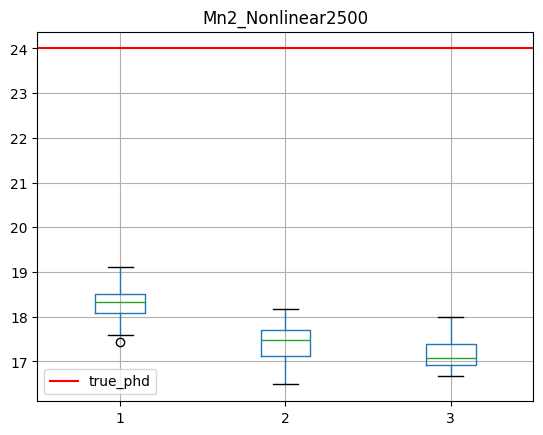

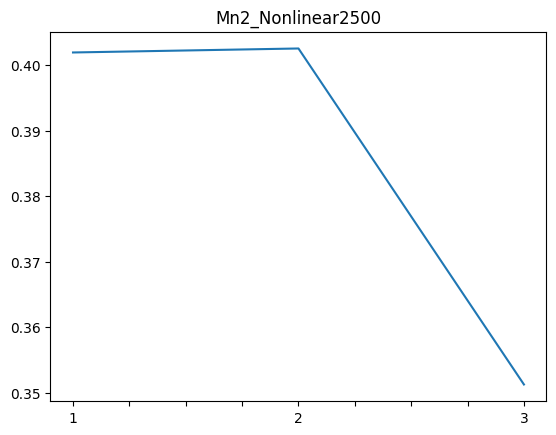

Mn1_Nonlinear2500


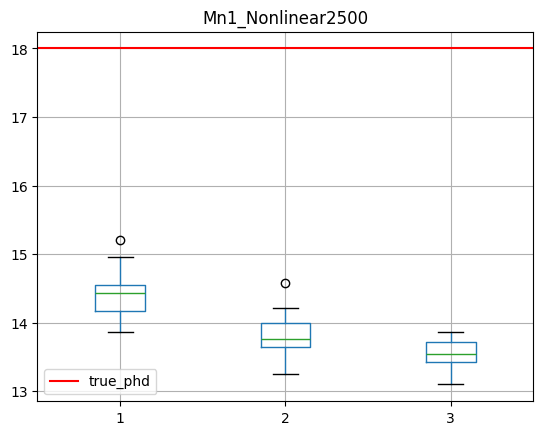

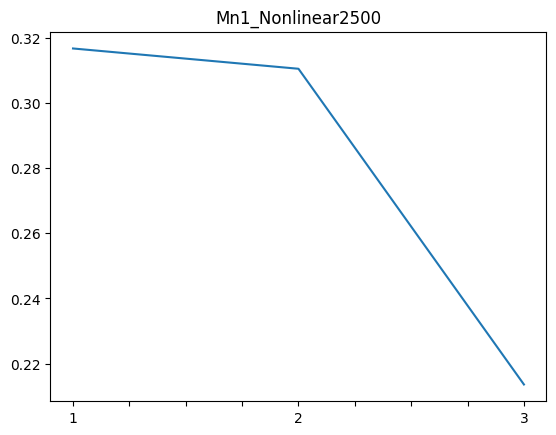

M6_Nonlinear2500


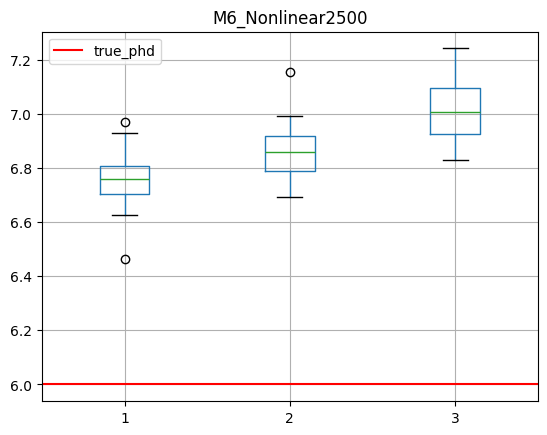

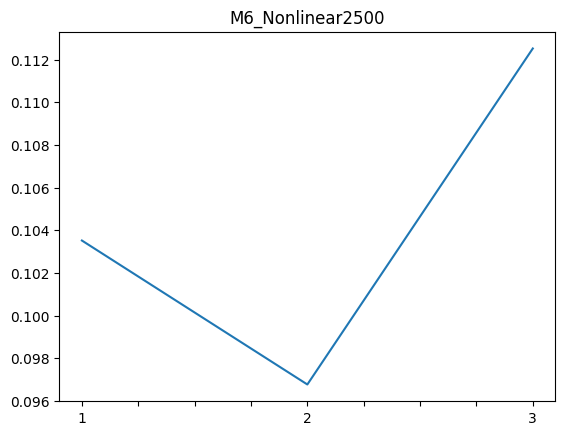

In [33]:
import matplotlib.pyplot as plt


for key in manifold_name2df.keys():
    print(key)
    true_phd = manifold2truephd[key]
    df_concat.query("manifold_name_full == @key").drop('n_dots', axis=1).boxplot()
    plt.axhline(y=true_phd, color='r', linestyle='-', label='true_phd')
    plt.legend()
    plt.title(key)
    plt.savefig(key + '.png')
    plt.show()
    df_concat.query("manifold_name_full == @key").drop('n_dots', axis=1)[[1, 2, 3]].std().plot()
    plt.title(key)
    plt.savefig(key + 'std.png')
    plt.show()

In [84]:
df_concat.to_csv("smth_strange_phd.csv", index=False)

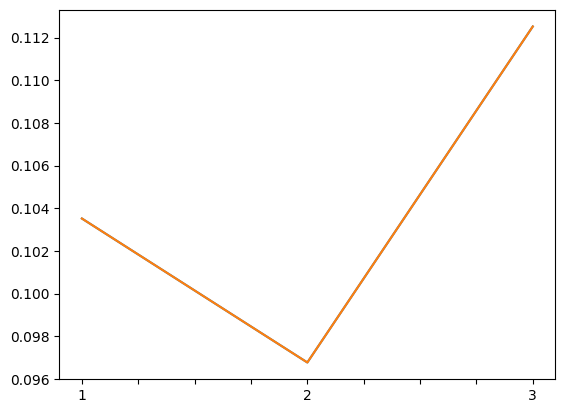

In [20]:
manifold2truephd = {
    'Mp3_Paraboloid2500': 9,
    'Mp2_Paraboloid2500': 6,
    'Mp1_Paraboloid2500': 3,
    'Mn2_Nonlinear2500': 24,
    'Mn1_Nonlinear2500': 18,
    'M6_Nonlinear2500': 6
}